In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
train = pd.read_csv('../data/train.csv')
train.shape

(1460, 81)

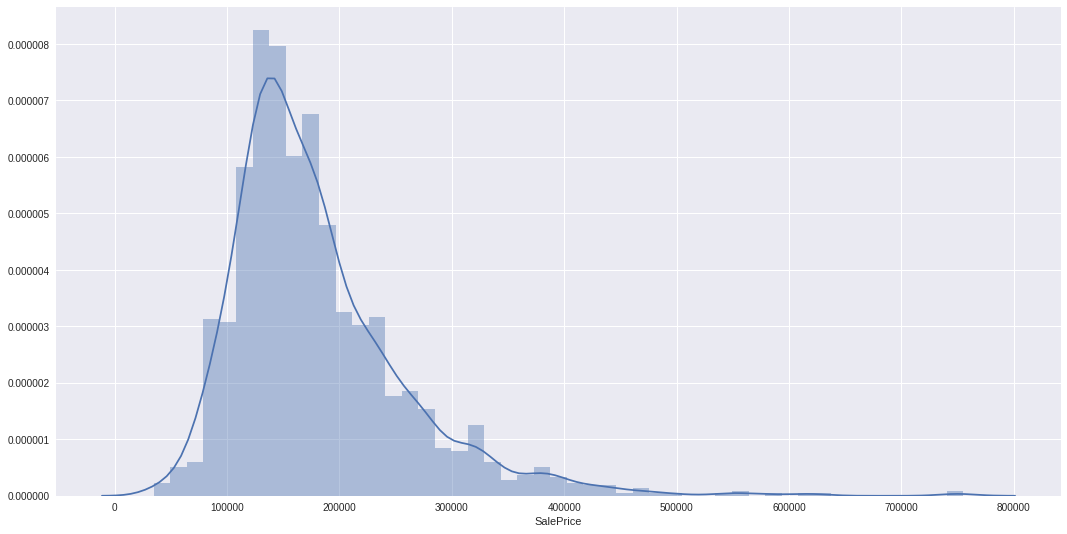

In [4]:
sns.distplot(train['SalePrice'])
plt.gcf().set_size_inches(18,9)
plt.show()

In [5]:
print("skewness is :%f" % train['SalePrice'].skew())
print('Kurtosis is :%f' % train['SalePrice'].kurt())

skewness is :1.882876
Kurtosis is :6.536282


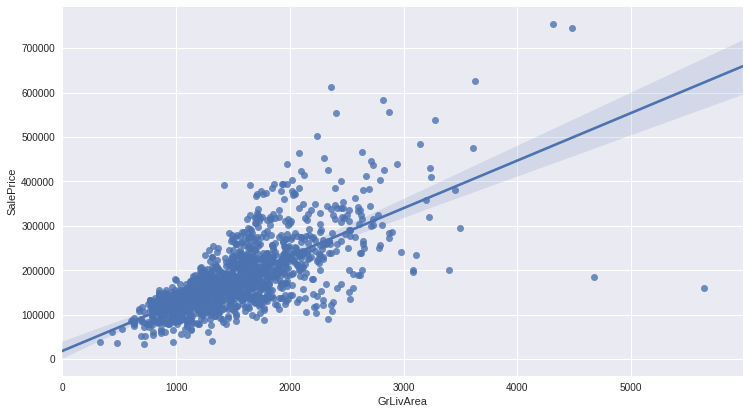

In [6]:
sns.lmplot(x='GrLivArea',y='SalePrice',data=train)
plt.gcf().set_size_inches(12,6)
plt.show()

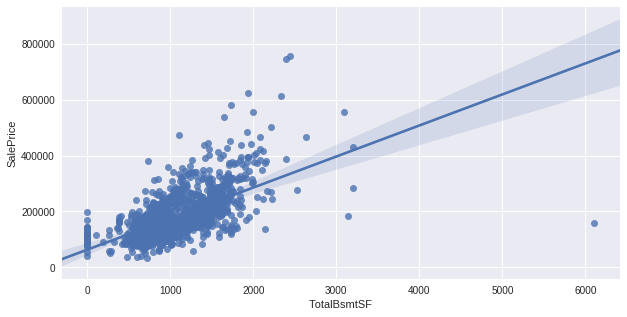

In [7]:
sns.regplot(x='TotalBsmtSF',y='SalePrice',data=train)
plt.gcf().set_size_inches(10,5)
plt.show()

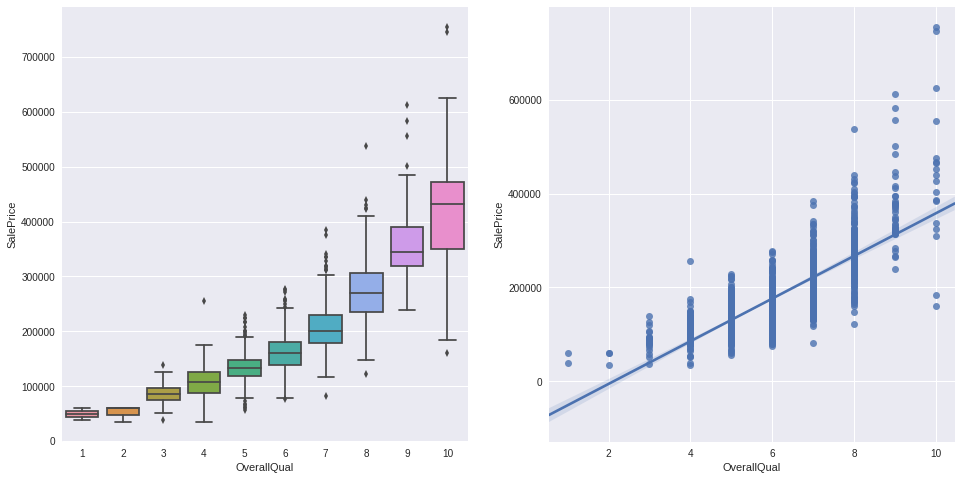

In [44]:
f,ax = plt.subplots(1,2,figsize=(16,8))
sns.boxplot(x='OverallQual',y='SalePrice',data=train,ax=ax[0])
sns.regplot(x='OverallQual',y='SalePrice',data=train,ax=ax[1])
plt.show()

In [9]:
train['YearBuilt'].head(10)

0    2003
1    1976
2    2001
3    1915
4    2000
5    1993
6    2004
7    1973
8    1931
9    1939
Name: YearBuilt, dtype: int64

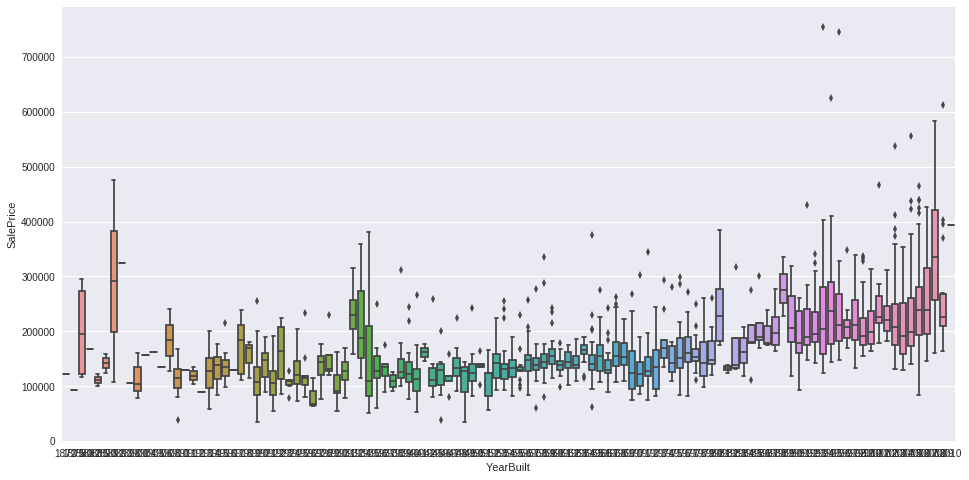

In [10]:
sns.boxplot(x='YearBuilt',y='SalePrice',data=train)
plt.gcf().set_size_inches(16,8)
plt.show()

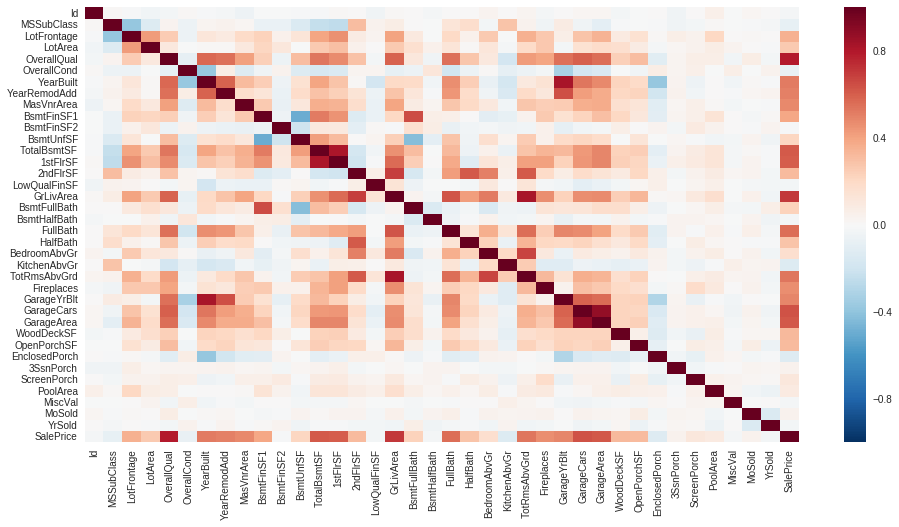

In [11]:
cormatrix = train.corr()
sns.heatmap(cormatrix)
plt.gcf().set_size_inches(16,8)

In [ ]:
k = 10
index = cormatrix.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[index])
sns.heatmap(cm,annot=True,xticklabels=index.values,yticklabels=index.values)
plt.gcf().set_size_inches(16,8)

In [50]:
cormatrix.nlargest(k,'SalePrice')['SalePrice'].index

Index([u'SalePrice', u'OverallQual', u'GrLivArea', u'GarageCars',
       u'GarageArea', u'TotalBsmtSF', u'1stFlrSF', u'FullBath',
       u'TotRmsAbvGrd', u'YearBuilt'],
      dtype='object')

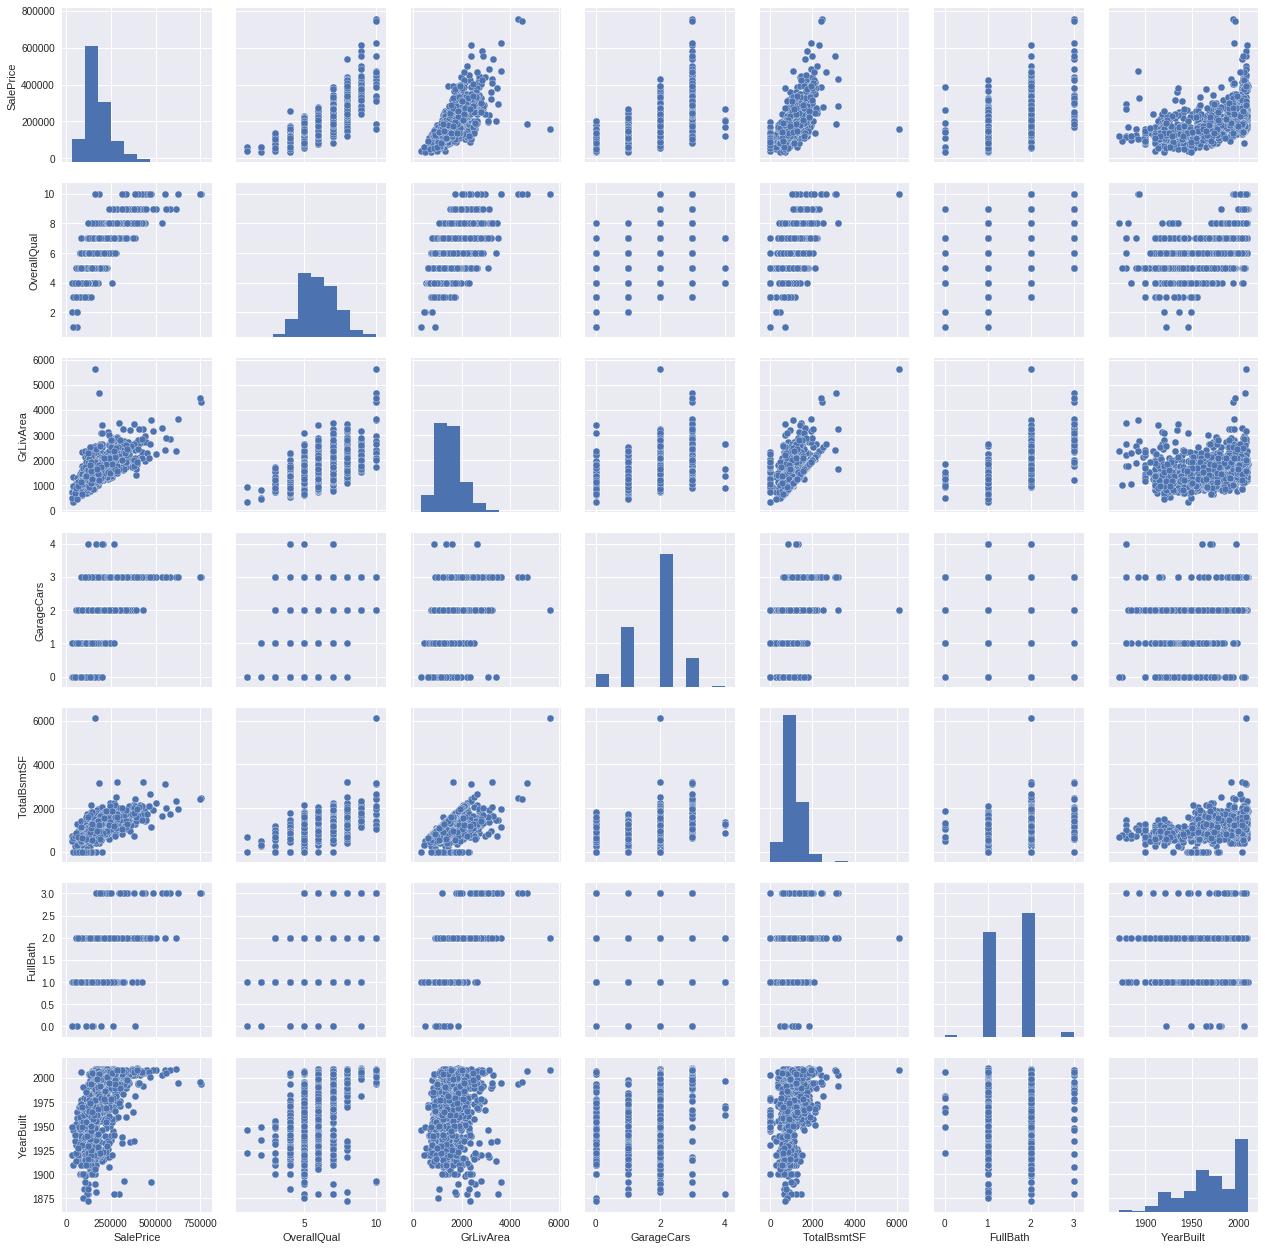

In [15]:
pair_data = train[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]
sns.pairplot(pair_data,size=2.5)
plt.show()

# missing data

In [28]:
missing_count = train.isnull().sum().sort_values(ascending=False)
missing_percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing_count,missing_percent],axis=1,keys=['Count','Percent'])
missing_data.head(20)

,Count,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [40]:
train = train.drop(missing_data[missing_data['Count']>=1].index,1)

In [41]:
train.isnull().sum().max()

0

In [38]:
missing_data.loc[missing_data['Count']>=1]

,Count,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479
